<a href="https://colab.research.google.com/github/shaya-686/AI/blob/main/%D0%94%D0%97_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [242]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [243]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


In [245]:
df['pclass'] = df['pclass'].astype(str)

In [246]:
#df = df[['pclass', 'age', 'embarked', 'fare']]
df.select_dtypes(include='number').describe()

,age,sibsp,parch,fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [247]:
df.select_dtypes(include='object').describe()

,pclass,sex,embarked
count,891,891,889
unique,3,2,3
top,3,male,S
freq,491,577,644


In [248]:
df[df['fare'] == 0 ]['fare'].count()

15

In [249]:
df = df[df['fare'] != 0]

# Завдання 1
Очистіть дані від викидів(лише `fare`), розділіть на тренувальну та тестову чатини

<Axes: >

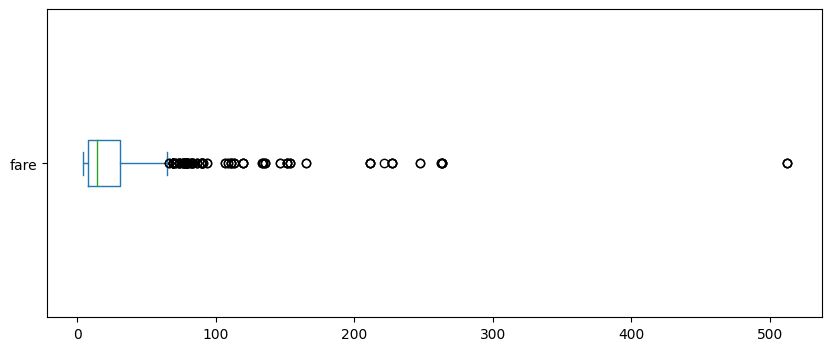

In [250]:
df['fare'].plot(kind='box', vert=False, figsize=(10,4))

In [251]:
q1 = df['fare'].quantile(q=0.25)
q3 = df['fare'].quantile(q=0.75)

IQR = q3 - q1
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR

mask = (df['fare'] >= lower) & (df['fare'] <= upper)
df = df[mask]

<Axes: >

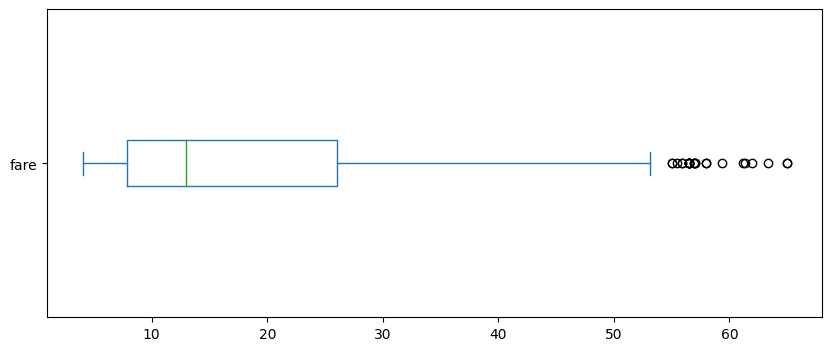

In [252]:
df['fare'].plot(kind='box', vert=False, figsize=(10,4))

In [253]:
y = df['fare']
X = df.drop(columns='fare')

In [254]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

# Завдання 2
Створіть Pipeline для обробки даних

In [255]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn import tree
from sklearn.preprocessing import PowerTransformer

num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns

num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),
           ('transformer',PowerTransformer())]
    )

cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns),
    ]
)
preprocessor.set_output(transform='pandas')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('transformer',
                                                  PowerTransformer())]),
                                 Index(['age', 'sibsp', 'parch'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['pclass', 'sex', 'embarked'], dtype='object'))])

# Завдання 3
Створіть остаточну модель та натренуйте її

In [256]:
model = Pipeline(
    [("prep", preprocessor),
     ("tree", tree.DecisionTreeRegressor(max_depth=4, min_samples_split = 0.1,
                                         random_state=42)
     )
     ]
)

model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('transformer',
                                                                   PowerTransformer())]),
                                                  Index(['age', 'sibsp', 'parch'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['pclass', 'sex', 'embarked'], dtype='object'))])),
                ('tree',
                 DecisionTreeRegressor(max_depth=4, min_samples_split=0.1,
                                       random_state=42))])

In [257]:
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('transformer',
                                                                   PowerTransformer())]),
                                                  Index(['age', 'sibsp', 'parch'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['pclass', 'sex', 'embarked'], dtype='object'))])),
                ('tree',
                 DecisionTreeRegressor(max_depth=4, min_samples_split=0.1,
                                       random_state=42))])

# Завдання 4
Виведіть основні метрики моделі

In [258]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

y_pred = model.predict(X_test)

all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, y_pred)


all_metrics


,train,test
MAE,4.18,4.05
RMSE,7.32,7.41
R2,0.70,0.73


In [259]:
import graphviz

dot_data = tree.export_graphviz(model['tree'], out_file=None,
                                feature_names = model['tree'].feature_names_in_)
graph = graphviz.Source(dot_data)
graph.render("fare tree")

'fare tree.pdf'

# Завдання 5
Змініть параметри моделі та попробуйте покращити результат

Попробуйте:
* не видаляти викиди
* змінити обробку даних(imputer та кодування категоріальних даних)
* змінити параметри дерева(глибина, кількість точок у листках тощо

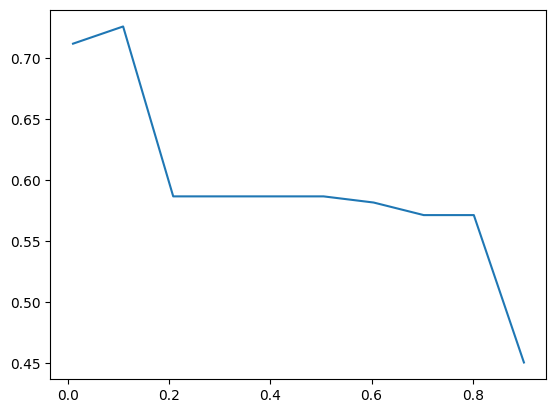

In [260]:
min_samples_split = np.linspace(0.01, 1.0, 10, endpoint=False)
r2 = []
for split in min_samples_split:
  model = Pipeline(
    [("prep", preprocessor),
     ("tree", tree.DecisionTreeRegressor(max_depth=4, min_samples_split = split, random_state=42))])

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  r2_value = metrics.r2_score(y_test, y_pred)
  r2.append(r2_value)

plt.plot(min_samples_split, r2)

# Завдання 6
Збережіть модель